<a href="https://colab.research.google.com/github/VictoriaOG1/Machine-Learning/blob/main/draft2_proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project
### Machine Learning
##### Members: Alejandra Ospina (00212243), Pamela Mena(), Paúl Quimbita() 
##### Date: 2023-05-10

## Introduction
*Introducción va aquí* 

## Desarrollo

In [23]:
#Librerias
import numpy as np 
import pandas as pd 
import re
import matplotlib.pyplot as plt 
import nltk
import gensim
import sklearn
import tensorflow as tf
from tensorflow import keras 
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.manifold import TSNE
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import RepeatedStratifiedKFold
from tabulate import tabulate
from nltk.corpus import stopwords
from gensim.models import Word2Vec
#nltk.download('stopwords')

#### Import dataset

In [24]:
#Read dataset
dataset = pd.read_csv("Tweets.csv")
dataset.columns = ['textID','text','selected_text', 'sentiment']

#Get columns selected_text and sentiment
dataset_text_x = dataset[['selected_text']]
dataset_target_y = dataset[['sentiment']]
#Data visualization 
headers = ['selected_text', 'sentiment']
complete_table = np.column_stack([dataset_text_x, dataset_target_y]) 
table = tabulate(complete_table[0:19,:], headers, tablefmt="rst")
print ("Visualizing first 20 rows")
print(table)


Visualizing first 20 rows
==========================================================================================================  ===========
selected_text                                                                                               sentiment
==========================================================================================================  ===========
I`d have responded, if I were going                                                                         neutral
Sooo SAD                                                                                                    negative
bullying me                                                                                                 negative
leave me alone                                                                                              negative
Sons of ****,                                                                                               negative
http://www.dothebouncy.com/smf -

#### Clean text

In [38]:
# Get columns selected_text and sentiment
selected_text = np.array(dataset['selected_text'].astype(str))
sentiment = np.array(dataset['sentiment'])

# Initialize an empty list to hold the cleaned selected text
cleaned_selected_text = []

# Define a regular expression pattern to match punctuation, symbols, and URLs
pattern = r'[^\w\s]|http\S+|www\S+'

# Iterate through each selected text in the dataset
for text in selected_text:
    # Use regular expressions to remove punctuation, symbols, and URLs
    cleaned_text = re.sub(pattern, '', text)
    # Append the cleaned selected text to the list and lowercase the text
    cleaned_selected_text.append(cleaned_text.lower())

# Print the first 10 cleaned selected texts
print("First 10 cleaned selected tweets: ")
print(cleaned_selected_text[:20])

First 10 cleaned selected tweets: 
['id have responded if i were going', 'sooo sad', 'bullying me', 'leave me alone', 'sons of ', '  some shameless plugging for the best rangers forum on earth', 'fun', 'soooo high', 'both of you', 'wow u just became cooler', 'as much as i love to be hopeful i reckon the chances are minimal p im never gonna get my cake and stuff', 'like', 'dangerously', 'lost', 'test test from the lg env2', 'uh oh i am sunburned', 'sigh', 'sick', 'onna', 'hes just not that into you']


#### Tokenize text and sentiments

If sentiment is positive it corresponds to number 2, if neutral number 1 and if negative number 0

In [42]:
# Import the set of stopwords from the nltk library
stop_words = set(stopwords.words('english'))

# Create empty lists to store cleaned tokens and sentiment values
tokenized_tweets = []
encoded_sentiment = []

# Loop through each cleaned text in the "cleaned_selected_text" list
for text in range(len(cleaned_selected_text)):
  
  # Split the cleaned text into a list of individual words
  clean_text = list(cleaned_selected_text[text].split())
  
  # Remove stopwords and words with a length of 1 from the list of words, and store in "clean_tokens"
  clean_tokens = [wrd for wrd in clean_text if wrd not in stop_words and len(wrd) > 1]
  clean_tokens = [wrd for wrd in clean_text if wrd not in stop_words]
  
  # If the cleaned token list is not empty, append it to the "tokens" list and assign the correct encoded sentiment value 
  if len(clean_tokens) > 0:
    tokenized_tweets.append(clean_tokens)
    if sentiment[text] == "negative":
      encoded_sentiment.append(0)
    if sentiment[text] == "neutral":
      encoded_sentiment.append(1)
    if sentiment[text] == "positive":
      encoded_sentiment.append(2)

# Print the list of cleaned tokens, as well as the lengths of the "tokens" and "clean_sentiment" lists
print("Tokenized tweets with length of", len(tokenized_tweets))
print("First five examples: ",tokenized_tweets[:5])
print("\nTokenized tweets with length of", len(encoded_sentiment))
print("First five examples: ", encoded_sentiment[:5])


Tokenized tweets with length of 27270
First five examples:  [['id', 'responded', 'going'], ['sooo', 'sad'], ['bullying'], ['leave', 'alone'], ['sons']]

Tokenized tweets with length of 27270
First five examples:  [1, 0, 0, 0, 0]


In [43]:
# Initialize variables to store the length of the longest tweet and its index
max_length = 0
max_index = None

# Loop through each tweet and compare its length to the current maximum length
for i, tweet in enumerate(tokenized_tweets):
    tweet_length = len(tweet)
    if tweet_length > max_length:
        max_length = tweet_length
        max_index = i

# Print the tweet with the most words
print("The tweet with the most words is:", tokenized_tweets[max_index], "with length", max_length)

The tweet with the most words is: ['lol', 'haha', 'fresh', 'death', 'lol', 'ha', 'ha', 'love', 'miss', 'u', '2', 'id', 'almost', 'given', 'ï½', 'u', 'cuz', 'u', 'nvr', 'respond', '2me', 'u', 'today', 'luv', 'u2'] with length 25


In [48]:
model_w2v = Word2Vec(sentences=tokenized_tweets, vector_size=max_length, window=5, min_count=1, workers=4)

model_w2v.train(tokenized_tweets, total_examples= len(tokenized_tweets), epochs=20)

(1621517, 2280940)

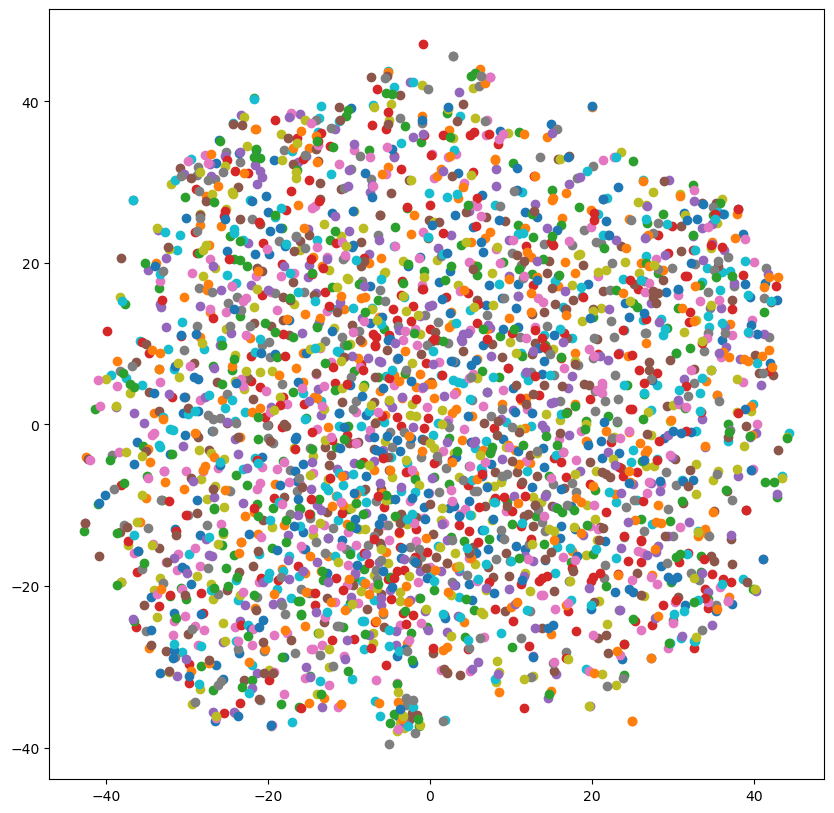

In [49]:
vocabulary = list(model_w2v.wv.index_to_key)
# Visualize embeddings
def plot_embeddings(model):
    # Get word vectors for each word in vocabulary
    X = model.wv[model.wv.index_to_key]
    
    # Use t-SNE to reduce dimensionality of embeddings to 2D
    tsne = TSNE(n_components=2)
    X_tsne = tsne.fit_transform(X)
    
    # Plot embeddings
    plt.figure(figsize=(10, 10))
    for i in range(len(vocabulary)):
        plt.scatter(X_tsne[i, 0], X_tsne[i, 1])
    plt.show()

plot_embeddings(model_w2v)

In [50]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0.
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))
            count += 1.
        except KeyError: # handling the case where the token is not in vocabulary
                         
            continue
    if count != 0:
        vec /= count
    return vec

In [51]:
wordvec_arrays = np.zeros((len(tokenized_tweets), max_length))

for i in range(len(tokenized_tweets)):
    wordvec_arrays[i,:] = word_vector(tokenized_tweets[i], max_length)
    
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

(27270, 25)

In [ ]:
print(wordvec_arrays)

[[ 0.23461156  0.88962944  0.20025054 ...  0.29013223  0.2129262
  -0.22181316]
 [ 0.18986933  0.47050104 -0.14063882 ... -0.96981663  0.27679279
  -0.39586926]
 [ 0.00395195 -0.00281215  0.00246438 ...  0.0089486   0.00243919
  -0.00579168]
 ...
 [-1.07596654  0.60424608  0.21960761 ... -0.29252354 -0.21385239
   0.1840555 ]
 [-0.04737022  0.26447183  0.19471806 ... -0.42416656  0.47989678
  -0.0771696 ]
 [-0.0804865   0.50783538  0.02921117 ...  0.16212187  0.02070895
  -0.03628137]]


In [53]:
X = np.array(wordvec_arrays)
y = np.array(encoded_sentiment)

accuracy_scores = []
auc_roc_scores = []
precision_scores = []
recall_scores = []
f1_scores_macro = []
f1_scores_weighted = []

data_selection = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state = 36851234)

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(3, activation='softmax')
                                    ])

model.compile(optimizer = tf.optimizers.Adam(),
                loss = 'sparse_categorical_crossentropy',
                metrics=['accuracy'])



In [ ]:
for i, (train_index, test_index) in enumerate(data_selection.split(X,y)):
  model.fit(X[train_index], y[train_index], batch_size = 128, epochs=5, verbose= False)
  model.evaluate(X[test_index], y[test_index], verbose=0)
  y_predict = model.predict(X[test_index])
  y_predict_labels = np.argmax(y_predict, axis=1)
  # Compute classification report
  report = classification_report(y[test_index], y_predict_labels, output_dict=True)
    
  # Append the scores to the corresponding list
  accuracy_scores.append(report['accuracy'])
  precision_scores.append(report['macro avg']['precision'])
  recall_scores.append(report['macro avg']['recall'])
  auc_roc_scores.append(roc_auc_score(y[test_index], y_predict, multi_class='ovo', average='macro'))
  f1_scores_macro.append(report['macro avg']['f1-score'])
  f1_scores_weighted.append(report['weighted avg']['f1-score'])

# Print the results
print(f'Accuracy: {np.mean(accuracy_scores):.3f} ± {np.std(accuracy_scores):.3f}')
print(f'AUC ROC: {np.mean(auc_roc_scores):.3f} ± {np.std(auc_roc_scores):.3f}')
print(f'Precision: {np.mean(precision_scores):.3f} ± {np.std(precision_scores):.3f}')
print(f'Recall: {np.mean(recall_scores):.3f} ± {np.std(recall_scores):.3f}')
print(f'F1 score (macro avg): {np.mean(f1_scores_macro):.3f} ± {np.std(f1_scores_macro):.3f}')
print(f'F1 score (weighted avg): {np.mean(f1_scores_weighted):.3f} ± {np.std(f1_scores_weighted):.3f}')

In [55]:
score = model.evaluate(X[test_index], y[test_index])
print(score)

86/86 [==============================] - 11s 134ms/step - loss: 1.1078 - accuracy: 0.3099
[1.1078494787216187, 0.3098643124103546]
